In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,NaN,1.0,3.0,4.0,3.0,NaN,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,1.0
679,2.0,NaN,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,NaN,10.0,4.0,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	64
float64		column 2	32
float64		column 3	82
float64		column 4	130
float64		column 5	16
float64		column 6	50
float64		column 7	64
float64		column 8	98
float64		column 9	48


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,619.000000,651.00000,601.000000,553.000000,667.000000,633.000000,619.000000,585.000000,635.000000
mean,4.400646,3.18894,3.059900,2.602170,3.233883,3.480253,3.332795,2.699145,1.603150
std,2.747355,3.07990,2.849516,2.594056,2.215667,3.592362,2.318996,2.888051,1.756463
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.00000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.00000,4.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

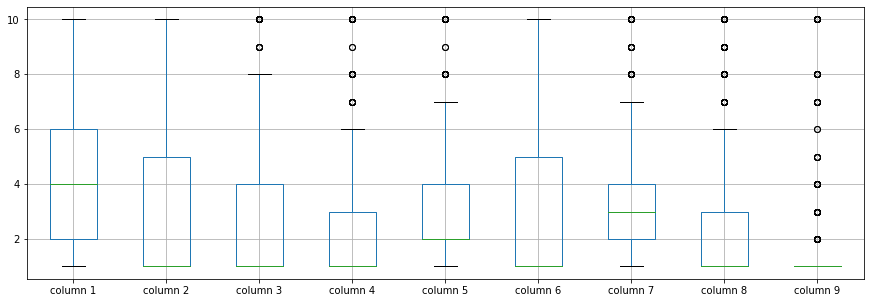

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.400646
column 2    3.188940
column 3    3.059900
column 4    2.602170
column 5    3.233883
column 6    3.480253
column 7    3.332795
column 8    2.699145
column 9    1.603150
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.629898,0.645698,0.472371,0.521367,0.584808,0.560448,0.522772,0.311921
column 2,0.629898,1.000000,0.901774,0.688560,0.747376,0.673708,0.743299,0.730369,0.471558
column 3,0.645698,0.901774,1.000000,0.668407,0.708113,0.684125,0.705974,0.704705,0.423604
column 4,0.472371,0.688560,0.668407,1.000000,0.596072,0.625411,0.622339,0.563374,0.374707
column 5,0.521367,0.747376,0.708113,0.596072,1.000000,0.572195,0.619021,0.614888,0.466632
column 6,0.584808,0.673708,0.684125,0.625411,0.572195,1.000000,0.661039,0.588077,0.312664
column 7,0.560448,0.743299,0.705974,0.622339,0.619021,0.661039,1.000000,0.647680,0.381542
column 8,0.522772,0.730369,0.704705,0.563374,0.614888,0.588077,0.647680,1.000000,0.423072
column 9,0.311921,0.471558,0.423604,0.374707,0.466632,0.312664,0.381542,0.423072,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+5,9+5+5,9+5+5,9+5+5+5+5,9+5+5+5+5+5,9+5+5+5+5+5+5,9+5+5+5+5+5,9+5+5+5+5,9+5+5+5,9+5+5,9+5,9], vae_layer = False, seed = 50)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 32.39758877527146
Epoch: 1 , loss: 32.510091645377024
Epoch: 2 , loss: 32.355386824834916
Epoch: 3 , loss: 32.49331074669247
Epoch: 4 , loss: 32.20150625138056
Epoch: 5 , loss: 32.16096033368792
Epoch: 6 , loss: 32.06308255876814
Epoch: 7 , loss: 31.962777591886976
Epoch: 8 , loss: 32.114002591087704
Epoch: 9 , loss: 31.822867756798153
Epoch: 10 , loss: 31.739884512765066
Epoch: 11 , loss: 31.89174511319115
Epoch: 12 , loss: 31.510253134227934
Epoch: 13 , loss: 30.442787828899565
Epoch: 14 , loss: 29.06708490280878
Epoch: 15 , loss: 27.90553333645775
Epoch: 16 , loss: 27.047622271946498
Epoch: 17 , loss: 26.836463928222656
Epoch: 18 , loss: 26.40474982488723
Epoch: 19 , loss: 26.0549209912618
Epoch: 20 , loss: 25.83550821031843
Epoch: 21 , loss: 26.128107661292667
Epoch: 22 , loss: 26.25269197282337
Epoch: 23 , loss: 25.921450274331228
Epoch: 24 , loss: 26.231531097775413
Epoch: 25 , loss: 26.3821762629

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    1.000000
column 4    0.086618
column 5    2.000000
column 6    1.000000
column 7    2.000000
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,-7.905068,0.000000,0.0,0.0,0.0,-6.903968,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-0.910177,0.0
679,0.000000,-0.926819,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
680,0.000000,0.000000,-9.927808,0.000000,0.0,0.0,0.0,0.000000,0.0
681,0.000000,0.000000,0.000000,-2.912944,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(125.17702945505907, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.3732970576580988

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.000000,1.000000,1.000000,2.0,1.0,3.0,1.000000,1.0
1,5.000000,4.000000,4.000000,5.000000,7.0,10.0,3.0,2.000000,1.0
2,3.000000,1.000000,1.000000,1.000000,2.0,2.0,3.0,1.000000,1.0
3,6.000000,8.000000,0.094932,1.000000,3.0,4.0,3.0,0.096032,1.0
4,4.000000,1.000000,1.000000,3.000000,2.0,1.0,3.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.000000,1.000000,1.000000,2.0,1.0,2.0,0.089823,1.0
679,2.000000,0.073181,1.000000,1.000000,2.0,1.0,3.0,1.000000,1.0
680,5.000000,10.000000,0.072192,10.000000,4.0,10.0,5.0,6.000000,3.0
681,1.000000,1.000000,1.000000,0.087056,2.0,1.0,1.0,1.000000,1.0


In [21]:
imputations[-1].to_excel("BCW_NN_10(imp).xlsx", index=False, header=False)